In [2]:
import numpy as np
import tensorflow as tf
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [3]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [4]:
y = X + 10

In [5]:
# 전체 데이터를 학습데이터 / 테스트 데이터로 나누기
# 머신러닝 프로젝트에서 가장 일반적이고 중요한 단계 중 하나
# Training set : 이 데이터로 모델이 학습, 일반적으로 전체 데이터셋에서 약 70~80% 정도를 취한다(학습)
# Validation set : 이 데이터로 학습 중인 모델을 검증, 일반적으로 약 10~15%정도를 취한다(모의고사)
# Test set : 이 데이터로 학습한 모델을 평가, 일반적으로 약 10~15%를 취한다(수능)

In [6]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

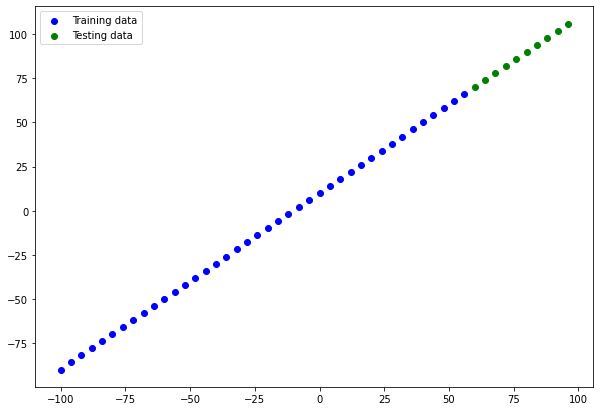

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", label = "Training data")
plt.scatter(X_test, y_test, c = "g", label="Testing data")
plt.legend();

In [9]:
tf.random.set_seed(42)

# 1. 모델을 create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model.compile(
    loss = tf.keras.losses.mae,   # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ["mae"]
)

In [10]:
# 3. 모델을 fit
model.fit(X, y, epochs = 100, verbose = 0)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [13]:
y_preds = model.predict(X_test)

In [14]:
y_preds, len(y_preds)

(array([[54.771538],
        [58.317333],
        [61.86313 ],
        [65.40893 ],
        [68.95472 ],
        [72.50052 ],
        [76.04631 ],
        [79.59211 ],
        [83.13791 ],
        [86.6837  ]], dtype=float32),
 10)

In [15]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_preds
):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c = "b", label = "Traning data")
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend()

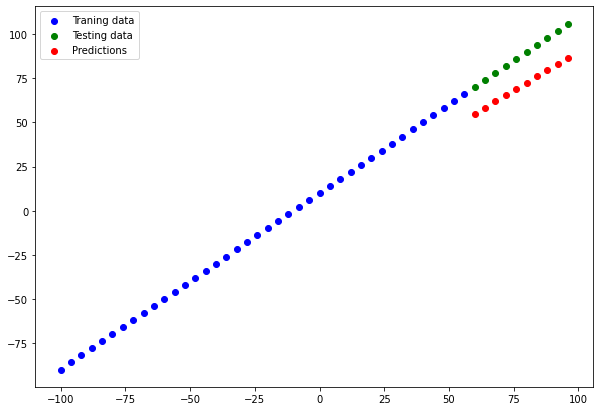

In [16]:
plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_preds
)

In [17]:
# 예측 결과를 평가(Evaluating predictions)
# 시각화와 병행해서, 평가 지표(metrics)를 보여주는 것도 좋음
# 우리가 해결하려는 문제 및 데이터셋에 따라, 평가지표는 각각 다르다
# regression 문제 해결 시 많이 사용하는 주요 지표 중 2개 다룰 것
# MAE(Mean Absolute Error) : 예측값 간의 거리들의 평균 구함
# MSE(Mean Square Error) : 예측값 간의 거리들의 평균을 제곱(오차 클수록 사용)

In [18]:
# 모델 평가(Evaluate)
model.evaluate(X_test, y_test) # 반환값이 loss함수의 값, 그리고 지정한 matrix의 계산값

1/1 [==============================] - 0s 6ms/step - loss: 17.2724 - mae: 17.2724


[17.272380828857422, 17.272380828857422]

In [19]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.228462, 29.682667, 26.136871, 22.59107 , 19.045282, 15.999585,
       13.572214, 11.763156, 10.572418, 10.      ], dtype=float32)>

In [20]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [21]:
y_preds

array([[54.771538],
       [58.317333],
       [61.86313 ],
       [65.40893 ],
       [68.95472 ],
       [72.50052 ],
       [76.04631 ],
       [79.59211 ],
       [83.13791 ],
       [86.6837  ]], dtype=float32)

In [22]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [23]:
# 위의 사례와 같이 input shape와 output shape의 모양을 잘 다루는 것이 중요
# 이런 상황이 자주 발생
# tensorflow를 이용해 처리할 때, 항상 두 텐서의 모양 비교하는 것 중요
# 입력과 출력의 모양이 일치하지 않으면 원하는 결과를 얻기 어려움

In [24]:
y_preds.squeeze().shape

(10,)

In [27]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds.squeeze())
mae.numpy()

17.27238

In [28]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_preds.squeeze())
mse.numpy()

300.0371

In [31]:
tf.reduce_mean(tf.abs(y_test - y_preds.squeeze())).numpy()

17.272380447387697

In [32]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, y_pred)

In [33]:
# 1. 더 많은 데이터 ==> 데이터에 숨겨진 패턴을 찾을 기회가 더 많아짐
# 2. 모델을 더 크고 정교하게 만듦 ==> 계층을 추가하거나 계층을 이루는 neuron을 더 추가
# 3. 더 많이 학습 ==> 데이터에 숨겨진 패턴을 찾을 기회가 더 많아짐

In [34]:
# 1. model_1 : 기존 model과 같은데 epoch를 100
# 2. model_2 : layer를 2개로 하고 epoch 100
# 3. model_3 : layer를 2개로 하고 epoch를 500

In [51]:
tf.random.set_seed(42)

# 1. 모델을 create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_1.compile(
    loss = tf.keras.losses.mae,   # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ["mae"]
)

# 3. 모델을 fit
model_1.fit(X, y, epochs = 100, verbose = 0)

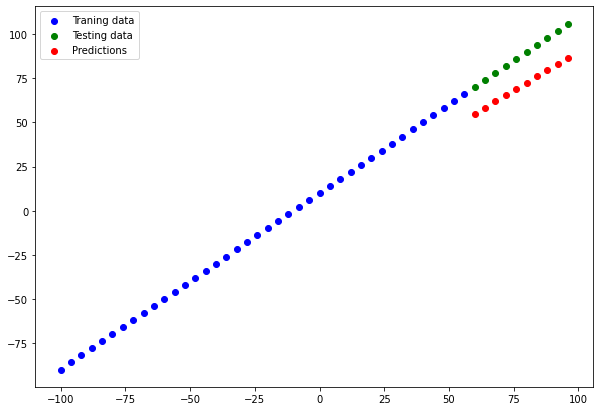

In [52]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [62]:
mae_1 = mae(y_test, y_pred_1.squeeze()).numpy()
mse_1 = mse(y_test, y_pred_1.squeeze()).numpy()
mae_1, mse_1

(17.27238, 300.0371)

In [54]:
#model 2 
tf.random.set_seed(42)

# 1. 모델을 create
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_2.compile(
    loss = tf.keras.losses.mae,   # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ["mae"]
)

# 3. 모델을 fit
model_2.fit(X, y, epochs = 100, verbose = 0)

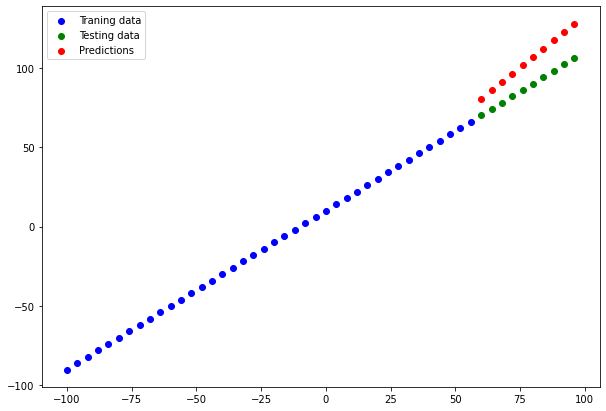

In [55]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [56]:
mae_2 = mae(y_test, y_pred_2.squeeze()).numpy()
mse_2 = mse(y_test, y_pred_2.squeeze()).numpy()
mae_2, mse_2

(16.108143, 272.32568)

In [57]:
#model 3
tf.random.set_seed(42)

# 1. 모델을 create
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model_3.compile(
    loss = tf.keras.losses.mae,   # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ["mae"]
)

# 3. 모델을 fit
model_3.fit(X, y, epochs = 500, verbose = 0)

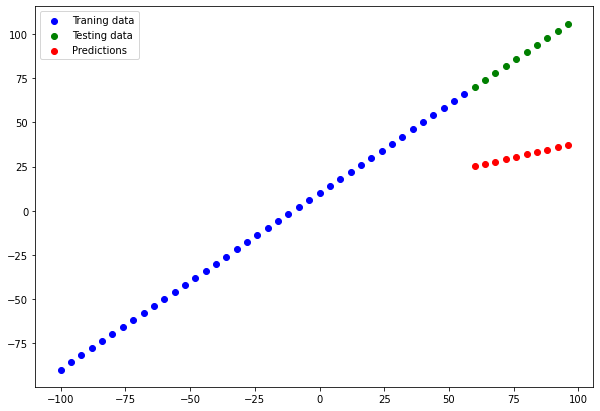

In [58]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [59]:
mae_3 = mae(y_test, y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test, y_pred_3.squeeze()).numpy()
mae_3, mse_3

(56.791283, 3283.4485)

In [60]:
# 각 모델의 hyperparameter 수정, 즉 hyperparameter tuning을 했는데, 결국 단편적인 값
# 지금까지 모델을 3개 만들었는데, 이 모델의 지표들을 비교 할 수 있어야 더 의미가 있음

In [64]:
model_results = [
    ["model1", mae_1, mse_1],
    ["model2", mae_2, mse_2],
    ["model3", mae_3, mse_3]
]

In [65]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model1,17.272381,300.037109
1,model2,16.108143,272.325684
2,model3,56.791283,3283.448486


In [66]:
# model 2가 마음에 듦
# => 웹 어플리케이션이나 모바일 장비에서 사용 등등 서비스로 구현하기 위해 모델을 저장하고 싶음

In [ ]:
# Tensorflow에서 모델을 저장하는 방법 2가지
# 1. SavedModel format (default)
# 2. HDF5 format
# 위 두가지 차이는 SavedModel이 모델을 다시 불러올 때 추가적인 작업이 없이도 자동으로 관련 정보 준비해줌
# 어떤 것을 사용하느냐는 상황에 맞춰 사용하면 되고, 대부분의 경우 SavedModel이면 충분

In [68]:
# 모델을 save
model_2.save('best_model_SavedModel_format')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [69]:
# 모델을 save
model_2.save('best_model_SavedModel_format.h5')